In [13]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# 윈저사이저 적용
df1 = pd.read_csv('./Same_sampling_ENN.csv',encoding='CP949')
df2 = pd.read_csv('./label지정.csv', encoding='cp949')

for col in df1.columns:
     df1[col] = winsorize(df1[col], limits= 0.01)

df1.columns

Index(['[제조]유동자산구성비율', '[제조]순운전자본비율', '[제조]총자본증가율', '[제조]매출채권회전률', '[제조]자본분배율',
       '[제조]매입채무회전기간', '[제조]비유동자산증가율', '[제조]매출액순이익률', '[제조]자기자본순이익률', 'year',
       'label'],
      dtype='object')

In [15]:
# train test set 분리
df1  #train 
df2 = df2[df2['year']>=2019]  #test
# train data label 분리 test data label 분리
X_train= df1[['[제조]유동자산구성비율', '[제조]순운전자본비율', '[제조]총자본증가율', '[제조]매출채권회전률', '[제조]자본분배율',
       '[제조]매입채무회전기간', '[제조]비유동자산증가율', '[제조]매출액순이익률', '[제조]자기자본순이익률']]
X_test = df2[['[제조]유동자산구성비율', '[제조]순운전자본비율', '[제조]총자본증가율', '[제조]매출채권회전률', '[제조]자본분배율',
       '[제조]매입채무회전기간', '[제조]비유동자산증가율', '[제조]매출액순이익률', '[제조]자기자본순이익률']]
y_train = df1["label"]
y_test = df2["label"]

# x_train_scaled= StandardScaler().fit_transform(X_train)
# x_test_scaled = fit_transform(X_test)
# # df_data_scaled= MinMaxScaler().fit_transform(df_data)
# X_train_scaled = pd.DataFrame(x_train_scaled)
X_test.describe()

,[제조]유동자산구성비율,[제조]순운전자본비율,[제조]총자본증가율,[제조]매출채권회전률,[제조]자본분배율,[제조]매입채무회전기간,[제조]비유동자산증가율,[제조]매출액순이익률,[제조]자기자본순이익률
count,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000
mean,53.098029,23.507811,15.547764,10.964246,-14.308633,30.777717,27.811356,-53.778948,-9.227491
std,19.038670,28.462693,68.692552,39.041133,558.760451,38.809046,197.025693,655.393621,85.528816
min,2.200000,-319.880000,-77.380000,0.000000,-22135.240000,0.000000,-93.710000,-22244.140000,-3342.120000
25%,39.830000,4.830000,-3.090000,4.340000,0.000000,11.675000,-4.185000,-9.990000,-10.490000
50%,53.200000,23.800000,5.720000,6.440000,31.250000,23.170000,5.370000,1.830000,2.320000
75%,66.710000,43.360000,18.880000,10.185000,50.870000,38.725000,23.640000,8.605000,9.570000
max,99.110000,95.740000,2579.670000,1294.310000,96.010000,558.620000,7919.440000,2096.990000,154.560000


In [16]:
# 기본적인 LDA 구현
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train,y_train)
lda_pred = lda_clf.predict(X_test)
lda_pred_proba = lda_clf.predict_proba(X_test)

In [17]:
from sklearn.model_selection import GridSearchCV


In [18]:
# 디시전트리 구현
from sklearn.tree import DecisionTreeClassifier       
dt_clf = DecisionTreeClassifier(random_state=52)     
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
dt_pred_proba = dt_clf.predict_proba(X_test)

In [8]:

# tree = DecisionTreeClassifier()

# # 딕셔너리로 전달
# # key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
# param_grid = {
#     'max_depth':[2,3,4,5,6,7,8], #7개
#     'min_samples_leaf':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]  #4개 --> 7x4 = 총 28개의 조합
# }
# grid_search = GridSearchCV(tree
#                           , param_grid = param_grid
#                           , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
#                           , n_jobs = -1)  #-1: 모든 코어 사용

# grid_search.fit(X_train, y_train)

# # 최선의 결과 출력
# print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

최적 하이퍼 파라미터 :{'max_depth': 3, 'min_samples_leaf': 6}, 최적 평균 정확도 :0.941


In [19]:
#최적 하이퍼 파라미터 :{'max_depth': 3, 'min_samples_leaf': 6}, 최적 평균 정확도 :0.941
  
dt_clf_best = DecisionTreeClassifier(random_state=52,max_depth= 3,min_samples_leaf=6)     
dt_clf_best.fit(X_train, y_train)
dt_best_pred = dt_clf_best.predict(X_test)
dt_best_pred_proba = dt_clf_best.predict_proba(X_test)

In [20]:
# 랜덤포레스트 구현
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)     
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

In [11]:
# # 하이퍼파라미터 Grid-Search
# from sklearn.model_selection import GridSearchCV

# # 탐색 범위 정의
# grid_search = {'criterion': ['entropy', 'gini'],
#                'max_depth': [2,4,6,8],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [4,6,8.10],
#                'min_samples_split': [4,6,8,10],
#                'n_estimators': [20,40,60,80,100]}

# model = RandomForestClassifier()
# grid = GridSearchCV(estimator = model, param_grid = grid_search, 
#                                cv = 4,verbose=0, n_jobs = -1)
# grid.fit(X_train,y_train)

# # 최선의 결과 출력
# print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid.best_params_, grid.best_score_))


최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 20}, 최적 평균 정확도 :0.957


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.94643937 0.94498589 0.94499429 0.94498589 0.94643937 0.94642257
 0.94644778 0.9435324  0.94643937 0.94643937 0.94786766 0.94643097
 0.94787606 0.9435324  0.94498589 0.94498589 0.94643937 0.94643097
 0.94497748 0.95077463 0.94932955 0.94644778 0.94644778 0.94643097
 0.94643097 0.94788446 0.94498589 0.94642257 0.9435408  0.94643937
 0.9435324  0.9435408  0.94499429 0.94643937 0.94787606 0.94789286
 0.9435324  0.94499429 0.94499429 0.94643937        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.9435492  0.94643097 0.94498589 0.94788446 0.94787606 0.94498589
 0.94932115 0.94788446 0.94643097 0.94643097 0.95221972 0.94209571
 0.94932955 0.94643097 0.94498589 0.94497748 0.944994

In [21]:
# 최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 20}, 최적 평균 정확도 :0.957
rf_clf_best = RandomForestClassifier(random_state=52, criterion = 'entropy', max_features= 'auto',
                                     max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=20)
rf_clf_best.fit(X_train, y_train)
rf_best_pred = rf_clf_best.predict(X_test)
rf_best_pred_proba = rf_clf_best.predict_proba(X_test)

In [22]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)


In [ ]:
#로지스틱 회귀 최적 하이퍼 파라미터
# from sklearn.model_selection import GridSearchCV

# params = {'penalty': ['l2','l1','elasticnet','None'],
#           'C':[0.01,0.1,1,1,5,10]}

# grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
# grid_clf.fit(X_train,y_train)
# print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

In [24]:
#최적 하이퍼 파라미어:{'C': 0.01, 'penalty': 'l2'}, 최적 평균 정확도:0.982
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀를 위한 스케일링 
lr_clf = LogisticRegression(C = 0.01, penalty= 'l2')
lr_clf.fit(X_train, y_train)
lr_best_pred = lr_clf.predict(X_test)
lr_best_pred_proba = lr_clf.predict_proba(X_test)

In [25]:
# KNN 모형 구현
# 3. 거리 계산을 위해서 각 특성들을 스케일링(표준화) [Z-score 표준화: 평균을 0, 표준편차 1로 변환]
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler() # Scaler 객체 생성
scaler.fit(X_train) 
knn_X_train = scaler.transform(X_train) # 스케일링(표준화 수행)
knn_X_test = scaler.transform(X_test)

# k-NN 분류기를 생성
knn_clf = KNeighborsClassifier(n_neighbors=5)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_pred = knn_clf.predict(knn_X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)


In [26]:
# knn 파라미터 구하기
from sklearn.metrics import accuracy_score
for k in range(1,11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(knn_X_train, y_train)
    knn_pred = knn_clf.predict(knn_X_test)
    knn_score=accuracy_score(y_test,knn_pred)
    print(k)
    print(knn_score)
    
    

1
0.6478379431242696
2
0.802493182703545
3
0.761199844176081
4
0.8243085313595637
5
0.8036618620958317
6
0.8441760810284379
7
0.8320997273081417
8
0.8507985975847293
9
0.8445656408258668
10
0.855862874951305


In [27]:
# knn 최적의 파라미터 모델
knn_clf = KNeighborsClassifier(n_neighbors=10)
# 분류기 학습
knn_clf.fit(knn_X_train, y_train)
# 예측

knn_best_pred = knn_clf.predict(knn_X_test)
knn_best_pred_proba = knn_clf.predict_proba(X_test)


In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
#XG 부스트 모형 구현
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance 
X_train_XG= df1[['[제조]유동자산구성비율', '[제조]순운전자본비율', '[제조]총자본증가율', '[제조]매출채권회전률', '[제조]자본분배율',
       '[제조]매입채무회전기간', '[제조]비유동자산증가율', '[제조]매출액순이익률', '[제조]자기자본순이익률']]
X_train_XG.columns = [['유동자산구성비율', '순운전자본비율', '총자본증가율', '매출채권회전률', '자본분배율',
       '매입채무회전기간', '비유동자산증가율', '매출액순이익률', '자기자본순이익률']]
X_test_XG = df2[['[제조]유동자산구성비율', '[제조]순운전자본비율', '[제조]총자본증가율', '[제조]매출채권회전률', '[제조]자본분배율',
       '[제조]매입채무회전기간', '[제조]비유동자산증가율', '[제조]매출액순이익률', '[제조]자기자본순이익률']]
X_test_XG.columns =[['유동자산구성비율', '순운전자본비율', '총자본증가율', '매출채권회전률', '자본분배율',
       '매입채무회전기간', '비유동자산증가율', '매출액순이익률', '자기자본순이익률']]
y_train_XG = df1["label"]
y_test_XG = df2["label"]
X_tr_XG, X_val_XG, y_tr_XG, y_val_XG = train_test_split(X_train_XG, y_train_XG,test_size = 0.1, random_state = 156)
# df1 = df[df['year']<2019] #train
# df2 = df[df['year']>=2019] #test
# train data label 분리 test data label 분리
params_dict = {'objective' : 'binary:logistic',
               'n_estimators' : 400,
               'learning_rate' : 0.05,
               'max_depth' : 3,
               'eval_metric' : 'logloss'
               }

xgb_wrapper = XGBClassifier(Param=params_dict)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)


xgb_pred = xgb_wrapper.predict(X_test)
xgb_pred_proba = xgb_wrapper.predict_proba(X_test)




[23:31:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "Param" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [ ]:
#xgb 최적 하이퍼 파라미터
# from sklearn.model_selection import GridSearchCV

# params = {
#           'n_estimators':[20,40,60,80,100],
#           'learning_rate':[0.03,0.05,0.07,0.09],
#           'max_depth' : [4,6,8,10]
#           }

# grid_clf = GridSearchCV(xgb_wrapper, param_grid=params, scoring='accuracy', cv=5)
# grid_clf.fit(X_train_XG,y_train_XG)
# print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

In [32]:
# 최적 하이퍼 파라미어:{'learning_rate': 0.09, 'max_depth': 6, 'n_estimators': 100}, 최적 평균 정확도:0.957
xgb_wrapper = XGBClassifier(learning_rate= 0.09, max_depth= 6, n_estimators= 100)

xgb_wrapper.fit(X_train_XG, y_train_XG, verbose = True)

xgb_best_pred = xgb_wrapper.predict(X_test)
xgb_best_pred_proba = xgb_wrapper.predict_proba(X_test)

In [33]:
#퍼셉트론 구현
# eta : 학습률 (float), n_iter : 훈련 데이터 반복 횟수 (int), w_ : 학습된 가중치 (1d-array)
class Perceptron(object):
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1): #초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y): #학습
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0, scale = 0.01,
                             size = 1 + X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for i in range(len(X)):
                xi = X.iloc[i].values
                target = y[i]
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def predict(self, X): #추론
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]



#초기(pc)
pc_clf = Perceptron(n_iter = 10)
pc_clf.fit(X_train, y_train)
pc_pred = pc_clf.predict(X_test)






In [34]:
from sklearn.metrics import accuracy_score

pc_scores = []
for i in range(1,11):
    pc_clf = Perceptron(n_iter=i)
    pc_clf.fit(X_train, y_train)
    pc_pred = pc_clf.predict(X_test)
    
    pc_scores=accuracy_score(y_test, pc_pred)
    print(i)
    print(pc_scores)



1
0.020646669263731984
2
0.022204908453447605
3
0.02415270744059213
4
0.022204908453447605
5
0.02259446825087651
6
0.019088430074016362
7
0.025321386832878847
8
0.020646669263731984
9
0.0884300740163615
10
0.018309310479158552


In [35]:
# 퍼셉트론 최적의 파라미터
pc_clf = Perceptron(n_iter = 9)
pc_clf.fit(X_train, y_train)
pc_best_pred = pc_clf.predict(X_test)



### lda_pred : 선형판별 분석 예측 값
### dt_pred : 디시전트리 예측 값
### dt_best_pred : 랜덤 포레스트 최적의 파라미터 값
### rf_pred : 랜덤 포레스트 예측 값
### rf_best_pred : 랜덤 포레스트 최적의 파라미터 값
### lr_pred : 로지스틱 회귀 예측 값
### lr_best_pred : 랜덤 포레스트 최적의 파라미터 값
### knn_pred : knn 예측 값
### knn_best_pred : knn 최적의 파라미터 값
### xgb_pred : xgb 예측 값
### xgb_best_pred : 랜덤 포레스트 최적의 파라미터 값
### pc_pred : 퍼셉트론 예측 값


In [36]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    pr_score = average_precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))
    
print("lda") 
print(get_clf_eval(y_test, lda_pred))
print("디시전트리") 
print(get_clf_eval(y_test, dt_pred))
print("디시전트리 최적의 모델") 
print(get_clf_eval(y_test, dt_best_pred))
print("랜덤포레스트") 
print(get_clf_eval(y_test, rf_pred))
print("랜덤포레스트 최적의 모델") 
print(get_clf_eval(y_test, rf_best_pred))
print("로지스틱") 
print(get_clf_eval(y_test, lr_pred))
print("로지스틱회귀 최적의 모델")
print(get_clf_eval(y_test, lr_best_pred))
print("Knn")
print(get_clf_eval(y_test, knn_pred))
print("Knn 최적의 모델")
print(get_clf_eval(y_test, knn_best_pred))
print("xgb")
print(get_clf_eval(y_test, xgb_pred))
print("xgb 최적의 모델")
print(get_clf_eval(y_test, xgb_best_pred))
print("다중 퍼셉트론")
print(get_clf_eval(y_test, pc_pred))
print("다중 퍼셉트론 최적의 모델")
print(get_clf_eval(y_test, pc_best_pred))



lda
오차행렬
[[2173  364]
 [  12   18]]
정확도: 0.8535, 정밀도 : 0.0471, 재현율:0.6000,F1 스코어:0.0874
ROC 스코어: 0.7283, PR score : 0.0329
None
디시전트리
오차행렬
[[1681  856]
 [   6   24]]
정확도: 0.6642, 정밀도 : 0.0273, 재현율:0.8000,F1 스코어:0.0527
ROC 스코어: 0.7313, PR score : 0.0242
None
디시전트리 최적의 모델
오차행렬
[[1914  623]
 [   9   21]]
정확도: 0.7538, 정밀도 : 0.0326, 재현율:0.7000,F1 스코어:0.0623
ROC 스코어: 0.7272, PR score : 0.0263
None
랜덤포레스트
오차행렬
[[1814  723]
 [   5   25]]
정확도: 0.7164, 정밀도 : 0.0334, 재현율:0.8333,F1 스코어:0.0643
ROC 스코어: 0.7742, PR score : 0.0298
None
랜덤포레스트 최적의 모델
오차행렬
[[1872  665]
 [   6   24]]
정확도: 0.7386, 정밀도 : 0.0348, 재현율:0.8000,F1 스코어:0.0668
ROC 스코어: 0.7689, PR score : 0.0302
None
로지스틱
오차행렬
[[1986  551]
 [   8   22]]
정확도: 0.7822, 정밀도 : 0.0384, 재현율:0.7333,F1 스코어:0.0730
ROC 스코어: 0.7581, PR score : 0.0313
None
로지스틱회귀 최적의 모델
오차행렬
[[1987  550]
 [   8   22]]
정확도: 0.7826, 정밀도 : 0.0385, 재현율:0.7333,F1 스코어:0.0731
ROC 스코어: 0.7583, PR score : 0.0313
None
Knn
오차행렬
[[2178  359]
 [  11   19]]
정확도: 0.8559, 정밀도 : 0.0503, 재현율:0.

In [37]:
# 임계값에 따른 오차행렬및 스코어 
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# thresholds = [0.6,0.65,0.7,0.75,0.8,0.85,0.9]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test , lda_pred_proba[:,1].reshape(-1,1), thresholds)
# get_eval_by_threshold(y_test , lda_pred[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[1957  580]
 [   8   22]]
정확도: 0.7709, 정밀도 : 0.0365, 재현율:0.7333,F1 스코어:0.0696
ROC 스코어: 0.7524, PR score : 0.0299
임곗값: 0.2
오차행렬
[[2044  493]
 [   9   21]]
정확도: 0.8044, 정밀도 : 0.0409, 재현율:0.7000,F1 스코어:0.0772
ROC 스코어: 0.7528, PR score : 0.0321
임곗값: 0.3
오차행렬
[[2102  435]
 [   9   21]]
정확도: 0.8270, 정밀도 : 0.0461, 재현율:0.7000,F1 스코어:0.0864
ROC 스코어: 0.7643, PR score : 0.0357
임곗값: 0.4
오차행렬
[[2141  396]
 [  11   19]]
정확도: 0.8414, 정밀도 : 0.0458, 재현율:0.6333,F1 스코어:0.0854
ROC 스코어: 0.7386, PR score : 0.0333
임곗값: 0.5
오차행렬
[[2173  364]
 [  12   18]]
정확도: 0.8535, 정밀도 : 0.0471, 재현율:0.6000,F1 스코어:0.0874
ROC 스코어: 0.7283, PR score : 0.0329
임곗값: 0.6
오차행렬
[[2207  330]
 [  12   18]]
정확도: 0.8668, 정밀도 : 0.0517, 재현율:0.6000,F1 스코어:0.0952
ROC 스코어: 0.7350, PR score : 0.0357
임곗값: 0.7
오차행렬
[[2235  302]
 [  14   16]]
정확도: 0.8769, 정밀도 : 0.0503, 재현율:0.5333,F1 스코어:0.0920
ROC 스코어: 0.7071, PR score : 0.0323
임곗값: 0.8
오차행렬
[[2257  280]
 [  14   16]]
정확도: 0.8855, 정밀도 : 0.0541, 재현율:0.5333,F1 스코어:0.0982
ROC 스코어: 0.

In [37]:
#디시전 트리
# 성능값 일정
get_eval_by_threshold(y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.2
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.3
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.4
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.5
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.6
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.7
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.5903, PR score : 0.0312
임곗값: 0.8
오차행렬
[[2488   49]
 [  24    6]]
정확도: 0.9716, 정밀도 : 0.1091, 재현율:0.2000,F1 스코어:0.1412
ROC 스코어: 0.

In [38]:
# 디시전트리 최적

get_eval_by_threshold(y_test , dt_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1740  797]
 [   8   22]]
정확도: 0.6864, 정밀도 : 0.0269, 재현율:0.7333,F1 스코어:0.0518
ROC 스코어: 0.7096, PR score : 0.0228
임곗값: 0.2
오차행렬
[[1740  797]
 [   8   22]]
정확도: 0.6864, 정밀도 : 0.0269, 재현율:0.7333,F1 스코어:0.0518
ROC 스코어: 0.7096, PR score : 0.0228
임곗값: 0.3
오차행렬
[[1740  797]
 [   8   22]]
정확도: 0.6864, 정밀도 : 0.0269, 재현율:0.7333,F1 스코어:0.0518
ROC 스코어: 0.7096, PR score : 0.0228
임곗값: 0.4
오차행렬
[[1914  623]
 [   9   21]]
정확도: 0.7538, 정밀도 : 0.0326, 재현율:0.7000,F1 스코어:0.0623
ROC 스코어: 0.7272, PR score : 0.0263
임곗값: 0.5
오차행렬
[[1914  623]
 [   9   21]]
정확도: 0.7538, 정밀도 : 0.0326, 재현율:0.7000,F1 스코어:0.0623
ROC 스코어: 0.7272, PR score : 0.0263
임곗값: 0.6
오차행렬
[[1914  623]
 [   9   21]]
정확도: 0.7538, 정밀도 : 0.0326, 재현율:0.7000,F1 스코어:0.0623
ROC 스코어: 0.7272, PR score : 0.0263
임곗값: 0.7
오차행렬
[[1914  623]
 [   9   21]]
정확도: 0.7538, 정밀도 : 0.0326, 재현율:0.7000,F1 스코어:0.0623
ROC 스코어: 0.7272, PR score : 0.0263
임곗값: 0.8
오차행렬
[[1914  623]
 [   9   21]]
정확도: 0.7538, 정밀도 : 0.0326, 재현율:0.7000,F1 스코어:0.0623
ROC 스코어: 0.

In [39]:
#로지스틱 회귀
#0.1 때 F1 스코어가 제일 좋음
get_eval_by_threshold(y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1409 1128]
 [   5   25]]
정확도: 0.5586, 정밀도 : 0.0217, 재현율:0.8333,F1 스코어:0.0423
ROC 스코어: 0.6944, PR score : 0.0200
임곗값: 0.2
오차행렬
[[1724  813]
 [   7   23]]
정확도: 0.6806, 정밀도 : 0.0275, 재현율:0.7667,F1 스코어:0.0531
ROC 스코어: 0.7231, PR score : 0.0238
임곗값: 0.3
오차행렬
[[1849  688]
 [   7   23]]
정확도: 0.7293, 정밀도 : 0.0323, 재현율:0.7667,F1 스코어:0.0621
ROC 스코어: 0.7477, PR score : 0.0275
임곗값: 0.4
오차행렬
[[1932  605]
 [   7   23]]
정확도: 0.7616, 정밀도 : 0.0366, 재현율:0.7667,F1 스코어:0.0699
ROC 스코어: 0.7641, PR score : 0.0308
임곗값: 0.5
오차행렬
[[1986  551]
 [   8   22]]
정확도: 0.7822, 정밀도 : 0.0384, 재현율:0.7333,F1 스코어:0.0730
ROC 스코어: 0.7581, PR score : 0.0313
임곗값: 0.6
오차행렬
[[2025  512]
 [   8   22]]
정확도: 0.7974, 정밀도 : 0.0412, 재현율:0.7333,F1 스코어:0.0780
ROC 스코어: 0.7658, PR score : 0.0333
임곗값: 0.7
오차행렬
[[2064  473]
 [   8   22]]
정확도: 0.8126, 정밀도 : 0.0444, 재현율:0.7333,F1 스코어:0.0838
ROC 스코어: 0.7734, PR score : 0.0357
임곗값: 0.8
오차행렬
[[2112  425]
 [   9   21]]
정확도: 0.8309, 정밀도 : 0.0471, 재현율:0.7000,F1 스코어:0.0882
ROC 스코어: 0.

In [40]:
# 로지 회귀 최적 파라미터

get_eval_by_threshold(y_test , lr_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1412 1125]
 [   5   25]]
정확도: 0.5598, 정밀도 : 0.0217, 재현율:0.8333,F1 스코어:0.0424
ROC 스코어: 0.6949, PR score : 0.0201
임곗값: 0.2
오차행렬
[[1728  809]
 [   7   23]]
정확도: 0.6821, 정밀도 : 0.0276, 재현율:0.7667,F1 스코어:0.0534
ROC 스코어: 0.7239, PR score : 0.0239
임곗값: 0.3
오차행렬
[[1852  685]
 [   7   23]]
정확도: 0.7304, 정밀도 : 0.0325, 재현율:0.7667,F1 스코어:0.0623
ROC 스코어: 0.7483, PR score : 0.0276
임곗값: 0.4
오차행렬
[[1933  604]
 [   7   23]]
정확도: 0.7620, 정밀도 : 0.0367, 재현율:0.7667,F1 스코어:0.0700
ROC 스코어: 0.7643, PR score : 0.0309
임곗값: 0.5
오차행렬
[[1987  550]
 [   8   22]]
정확도: 0.7826, 정밀도 : 0.0385, 재현율:0.7333,F1 스코어:0.0731
ROC 스코어: 0.7583, PR score : 0.0313
임곗값: 0.6
오차행렬
[[2026  511]
 [   8   22]]
정확도: 0.7978, 정밀도 : 0.0413, 재현율:0.7333,F1 스코어:0.0782
ROC 스코어: 0.7660, PR score : 0.0334
임곗값: 0.7
오차행렬
[[2067  470]
 [   8   22]]
정확도: 0.8138, 정밀도 : 0.0447, 재현율:0.7333,F1 스코어:0.0843
ROC 스코어: 0.7740, PR score : 0.0359
임곗값: 0.8
오차행렬
[[2114  423]
 [   9   21]]
정확도: 0.8317, 정밀도 : 0.0473, 재현율:0.7000,F1 스코어:0.0886
ROC 스코어: 0.

In [41]:
#랜덤 포레스트

get_eval_by_threshold(y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)


임곗값: 0.1
오차행렬
[[ 982 1555]
 [   2   28]]
정확도: 0.3935, 정밀도 : 0.0177, 재현율:0.9333,F1 스코어:0.0347
ROC 스코어: 0.6602, PR score : 0.0173
임곗값: 0.2
오차행렬
[[1287 1250]
 [   3   27]]
정확도: 0.5119, 정밀도 : 0.0211, 재현율:0.9000,F1 스코어:0.0413
ROC 스코어: 0.7036, PR score : 0.0202
임곗값: 0.3
오차행렬
[[1503 1034]
 [   3   27]]
정확도: 0.5960, 정밀도 : 0.0254, 재현율:0.9000,F1 스코어:0.0495
ROC 스코어: 0.7462, PR score : 0.0241
임곗값: 0.4
오차행렬
[[1680  857]
 [   3   27]]
정확도: 0.6650, 정밀도 : 0.0305, 재현율:0.9000,F1 스코어:0.0591
ROC 스코어: 0.7811, PR score : 0.0287
임곗값: 0.5
오차행렬
[[1814  723]
 [   5   25]]
정확도: 0.7164, 정밀도 : 0.0334, 재현율:0.8333,F1 스코어:0.0643
ROC 스코어: 0.7742, PR score : 0.0298
임곗값: 0.6
오차행렬
[[1947  590]
 [   7   23]]
정확도: 0.7674, 정밀도 : 0.0375, 재현율:0.7667,F1 스코어:0.0715
ROC 스코어: 0.7671, PR score : 0.0315
임곗값: 0.7
오차행렬
[[2053  484]
 [   8   22]]
정확도: 0.8083, 정밀도 : 0.0435, 재현율:0.7333,F1 스코어:0.0821
ROC 스코어: 0.7713, PR score : 0.0350
임곗값: 0.8
오차행렬
[[2139  398]
 [   9   21]]
정확도: 0.8414, 정밀도 : 0.0501, 재현율:0.7000,F1 스코어:0.0935
ROC 스코어: 0.

In [42]:
#랜덤 포레스트 최적 파라미터 

get_eval_by_threshold(y_test , rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1047 1490]
 [   2   28]]
정확도: 0.4188, 정밀도 : 0.0184, 재현율:0.9333,F1 스코어:0.0362
ROC 스코어: 0.6730, PR score : 0.0180
임곗값: 0.2
오차행렬
[[1416 1121]
 [   3   27]]
정확도: 0.5621, 정밀도 : 0.0235, 재현율:0.9000,F1 스코어:0.0458
ROC 스코어: 0.7291, PR score : 0.0223
임곗값: 0.3
오차행렬
[[1614  923]
 [   3   27]]
정확도: 0.6393, 정밀도 : 0.0284, 재현율:0.9000,F1 스코어:0.0551
ROC 스코어: 0.7681, PR score : 0.0267
임곗값: 0.4
오차행렬
[[1757  780]
 [   6   24]]
정확도: 0.6938, 정밀도 : 0.0299, 재현율:0.8000,F1 스코어:0.0576
ROC 스코어: 0.7463, PR score : 0.0262
임곗값: 0.5
오차행렬
[[1872  665]
 [   6   24]]
정확도: 0.7386, 정밀도 : 0.0348, 재현율:0.8000,F1 스코어:0.0668
ROC 스코어: 0.7689, PR score : 0.0302
임곗값: 0.6
오차행렬
[[1955  582]
 [   7   23]]
정확도: 0.7705, 정밀도 : 0.0380, 재현율:0.7667,F1 스코어:0.0724
ROC 스코어: 0.7686, PR score : 0.0319
임곗값: 0.7
오차행렬
[[2048  489]
 [   8   22]]
정확도: 0.8064, 정밀도 : 0.0431, 재현율:0.7333,F1 스코어:0.0813
ROC 스코어: 0.7703, PR score : 0.0347
임곗값: 0.8
오차행렬
[[2135  402]
 [   9   21]]
정확도: 0.8399, 정밀도 : 0.0496, 재현율:0.7000,F1 스코어:0.0927
ROC 스코어: 0.

In [43]:
#knn 

get_eval_by_threshold(y_test , knn_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[ 497 2040]
 [   0   30]]
정확도: 0.2053, 정밀도 : 0.0145, 재현율:1.0000,F1 스코어:0.0286
ROC 스코어: 0.5980, PR score : 0.0145
임곗값: 0.2
오차행렬
[[ 823 1714]
 [   1   29]]
정확도: 0.3319, 정밀도 : 0.0166, 재현율:0.9667,F1 스코어:0.0327
ROC 스코어: 0.6455, PR score : 0.0165
임곗값: 0.3
오차행렬
[[ 823 1714]
 [   1   29]]
정확도: 0.3319, 정밀도 : 0.0166, 재현율:0.9667,F1 스코어:0.0327
ROC 스코어: 0.6455, PR score : 0.0165
임곗값: 0.4
오차행렬
[[1280 1257]
 [   2   28]]
정확도: 0.5095, 정밀도 : 0.0218, 재현율:0.9333,F1 스코어:0.0426
ROC 스코어: 0.7189, PR score : 0.0211
임곗값: 0.5
오차행렬
[[1280 1257]
 [   2   28]]
정확도: 0.5095, 정밀도 : 0.0218, 재현율:0.9333,F1 스코어:0.0426
ROC 스코어: 0.7189, PR score : 0.0211
임곗값: 0.6
오차행렬
[[1555  982]
 [   5   25]]
정확도: 0.6155, 정밀도 : 0.0248, 재현율:0.8333,F1 스코어:0.0482
ROC 스코어: 0.7231, PR score : 0.0226
임곗값: 0.7
오차행렬
[[1555  982]
 [   5   25]]
정확도: 0.6155, 정밀도 : 0.0248, 재현율:0.8333,F1 스코어:0.0482
ROC 스코어: 0.7231, PR score : 0.0226
임곗값: 0.8
오차행렬
[[1724  813]
 [   7   23]]
정확도: 0.6806, 정밀도 : 0.0275, 재현율:0.7667,F1 스코어:0.0531
ROC 스코어: 0.

In [44]:
#knn 최적 파라미터 적용

get_eval_by_threshold(y_test , knn_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[ 608 1929]
 [   0   30]]
정확도: 0.2485, 정밀도 : 0.0153, 재현율:1.0000,F1 스코어:0.0302
ROC 스코어: 0.6198, PR score : 0.0153
임곗값: 0.2
오차행렬
[[ 965 1572]
 [   1   29]]
정확도: 0.3872, 정밀도 : 0.0181, 재현율:0.9667,F1 스코어:0.0356
ROC 스코어: 0.6735, PR score : 0.0179
임곗값: 0.3
오차행렬
[[1250 1287]
 [   2   28]]
정확도: 0.4979, 정밀도 : 0.0213, 재현율:0.9333,F1 스코어:0.0416
ROC 스코어: 0.7130, PR score : 0.0207
임곗값: 0.4
오차행렬
[[1430 1107]
 [   3   27]]
정확도: 0.5676, 정밀도 : 0.0238, 재현율:0.9000,F1 스코어:0.0464
ROC 스코어: 0.7318, PR score : 0.0226
임곗값: 0.5
오차행렬
[[1543  994]
 [   4   26]]
정확도: 0.6112, 정밀도 : 0.0255, 재현율:0.8667,F1 스코어:0.0495
ROC 스코어: 0.7374, PR score : 0.0236
임곗값: 0.6
오차행렬
[[1628  909]
 [   6   24]]
정확도: 0.6436, 정밀도 : 0.0257, 재현율:0.8000,F1 스코어:0.0498
ROC 스코어: 0.7209, PR score : 0.0229
임곗값: 0.7
오차행렬
[[1697  840]
 [   6   24]]
정확도: 0.6704, 정밀도 : 0.0278, 재현율:0.8000,F1 스코어:0.0537
ROC 스코어: 0.7345, PR score : 0.0246
임곗값: 0.8
오차행렬
[[1768  769]
 [   8   22]]
정확도: 0.6973, 정밀도 : 0.0278, 재현율:0.7333,F1 스코어:0.0536
ROC 스코어: 0.

In [45]:
#xgb 

get_eval_by_threshold(y_test , xgb_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1331 1206]
 [   4   26]]
정확도: 0.5286, 정밀도 : 0.0211, 재현율:0.8667,F1 스코어:0.0412
ROC 스코어: 0.6957, PR score : 0.0198
임곗값: 0.2
오차행렬
[[1516 1021]
 [   5   25]]
정확도: 0.6003, 정밀도 : 0.0239, 재현율:0.8333,F1 스코어:0.0465
ROC 스코어: 0.7154, PR score : 0.0219
임곗값: 0.3
오차행렬
[[1610  927]
 [   5   25]]
정확도: 0.6369, 정밀도 : 0.0263, 재현율:0.8333,F1 스코어:0.0509
ROC 스코어: 0.7340, PR score : 0.0238
임곗값: 0.4
오차행렬
[[1692  845]
 [   6   24]]
정확도: 0.6685, 정밀도 : 0.0276, 재현율:0.8000,F1 스코어:0.0534
ROC 스코어: 0.7335, PR score : 0.0244
임곗값: 0.5
오차행렬
[[1752  785]
 [   7   23]]
정확도: 0.6915, 정밀도 : 0.0285, 재현율:0.7667,F1 스코어:0.0549
ROC 스코어: 0.7286, PR score : 0.0246
임곗값: 0.6
오차행렬
[[1798  739]
 [   7   23]]
정확도: 0.7094, 정밀도 : 0.0302, 재현율:0.7667,F1 스코어:0.0581
ROC 스코어: 0.7377, PR score : 0.0259
임곗값: 0.7
오차행렬
[[1861  676]
 [   7   23]]
정확도: 0.7339, 정밀도 : 0.0329, 재현율:0.7667,F1 스코어:0.0631
ROC 스코어: 0.7501, PR score : 0.0280
임곗값: 0.8
오차행렬
[[1913  624]
 [   7   23]]
정확도: 0.7542, 정밀도 : 0.0355, 재현율:0.7667,F1 스코어:0.0679
ROC 스코어: 0.

In [46]:
# xgb 최적 파라미터 적용

get_eval_by_threshold(y_test , xgb_best_pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.1
오차행렬
[[1265 1272]
 [   4   26]]
정확도: 0.5029, 정밀도 : 0.0200, 재현율:0.8667,F1 스코어:0.0392
ROC 스코어: 0.6826, PR score : 0.0189
임곗값: 0.2
오차행렬
[[1475 1062]
 [   4   26]]
정확도: 0.5847, 정밀도 : 0.0239, 재현율:0.8667,F1 스코어:0.0465
ROC 스코어: 0.7240, PR score : 0.0223
임곗값: 0.3
오차행렬
[[1583  954]
 [   5   25]]
정확도: 0.6264, 정밀도 : 0.0255, 재현율:0.8333,F1 스코어:0.0496
ROC 스코어: 0.7286, PR score : 0.0232
임곗값: 0.4
오차행렬
[[1674  863]
 [   5   25]]
정확도: 0.6619, 정밀도 : 0.0282, 재현율:0.8333,F1 스코어:0.0545
ROC 스코어: 0.7466, PR score : 0.0254
임곗값: 0.5
오차행렬
[[1733  804]
 [   6   24]]
정확도: 0.6845, 정밀도 : 0.0290, 재현율:0.8000,F1 스코어:0.0559
ROC 스코어: 0.7415, PR score : 0.0255
임곗값: 0.6
오차행렬
[[1802  735]
 [   6   24]]
정확도: 0.7113, 정밀도 : 0.0316, 재현율:0.8000,F1 스코어:0.0608
ROC 스코어: 0.7551, PR score : 0.0276
임곗값: 0.7
오차행렬
[[1868  669]
 [   7   23]]
정확도: 0.7367, 정밀도 : 0.0332, 재현율:0.7667,F1 스코어:0.0637
ROC 스코어: 0.7515, PR score : 0.0282
임곗값: 0.8
오차행렬
[[1936  601]
 [   7   23]]
정확도: 0.7631, 정밀도 : 0.0369, 재현율:0.7667,F1 스코어:0.0703
ROC 스코어: 0.

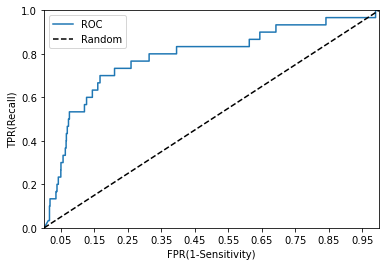

lda의 ROC AUC값: 0.7862


In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lda_clf.predict_proba(X_test)[:,1])
pred_proba = lda_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))


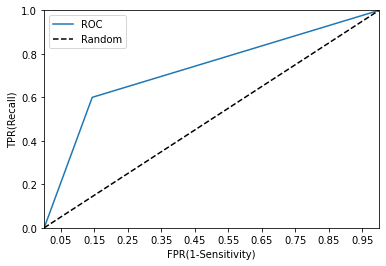

lda의 ROC AUC값: 0.7283


In [48]:
roc_curve_plot(y_test, lda_clf.predict(X_test))
roc_score = roc_auc_score(y_test, lda_pred)
print('lda의 ROC AUC값: {0:.4f}'.format(roc_score))

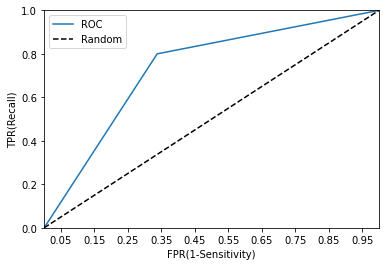

dt ROC AUC값: 0.7313


In [49]:
roc_curve_plot(y_test, dt_clf.predict_proba(X_test)[:,1])
pred_proba = dt_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('dt ROC AUC값: {0:.4f}'.format(roc_score))


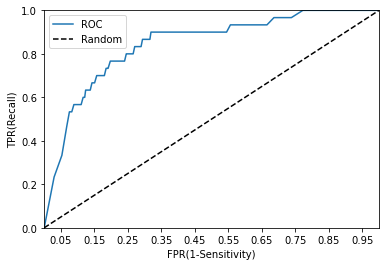

rf ROC AUC값: 0.8432


In [50]:
roc_curve_plot(y_test, rf_clf.predict_proba(X_test)[:,1])
pred_proba = rf_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('rf ROC AUC값: {0:.4f}'.format(roc_score))

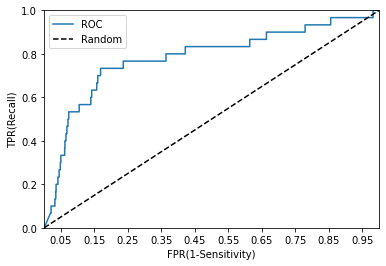

lr ROC AUC값: 0.7829


In [51]:
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('lr ROC AUC값: {0:.4f}'.format(roc_score))

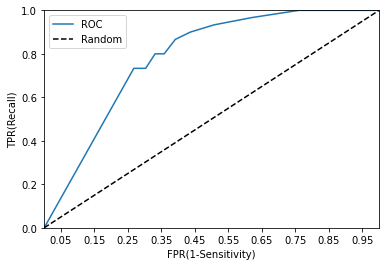

knn ROC AUC값: 0.7844


In [52]:
roc_curve_plot(y_test, knn_clf.predict_proba(X_test)[:,1])
pred_proba = knn_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))

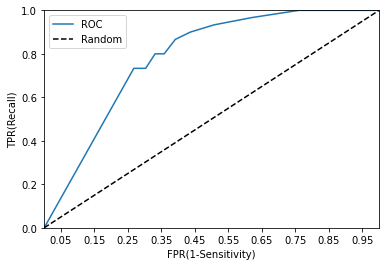

knn ROC AUC값: 0.7844


In [53]:
roc_curve_plot(y_test, knn_clf.predict_proba(X_test)[:,1])
pred_proba = knn_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('knn ROC AUC값: {0:.4f}'.format(roc_score))
